# COMP2420/6420 - Introduction to Data Management, Analysis and Security


### Australian National University

### College of Engineering and Computer Science

Assignment 2 
============

  
|**Maximum marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **15% of the total marks for the course**
|  **Submission deadline** |  **5pm, Thursday, April 26**
|  **Submission mode**     |  **Electronic, using wattle**
|  **Estimated time**      |  **15 hours**
|  **Penalty**             |  **100% after the deadline**
  


# Submission

You need to submit the notebook `Assignment-2.ipynb` as part of your submission on wattle. You need to add your group and student details below. Remember your filename should be exact as given below. Any changes to file name would mean your file can't be graded by the auto=grader, resulting in zero marks.

**Note**

* For answers requiring free form written text, use designated cells denoted by `YOUR ANSWER HERE`, just double click and start writing inside them.
* For all coding questions please write your code after the comment `YOUR CODE HERE`.
* After inserting your code **please remove** the following line from each code cell `raise NotImplementedError()`.
* To test your code, you can insert more cells or some print statements, but while submitting the file remember to remove those extra cells and print statements.
* We have marked some questions with a tag **hard** and **slightly hard**, so that you can plan your time accordingly
* We advice students to skip Q1 and use our cleaned dataset if they struggle with it. You can always come back after finishing all other questions.

###### Group Name : 218
### Student Id1: u6028474
### Student Id2: u6161780

In [1]:
import json
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
## inline figures
%matplotlib inline

## Q1 [15 marks]

Complete the  function `read_json(directory)` to read all the tweets from the folder `data/yt_tweets` into a single dataframe. There is more than one file inside the folder. Your function must take as an argument the data folder where all the files are kept and should return a single dataframe. Make sure you read only `.json` files in the folder.

Each line in the files corresponds to a tweet, where the structure for a tweet is encoded as a `json` object. The details about a [tweet](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object) object as given by [Twitter](https://twitter.com/?lang=en) can be found on their [developer page](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object).

You need to write a function that extracts the following details into a dataframe from a tweet:

* creation date (datetime for tweet)
* id_str (unique id of the tweet)
* user_id_str (unique id of the user who tweeted the tweet)
* retweeted_id (if it's a retweet, unique id of the tweet it is retweet of else np.nan)
* user_followers (no.of followers of the user who tweeted)
* user_friends (no.of friends of the user who tweeted)
* number of user mentions in the tweet (no.of user mentions in the tweet)
* number of hashtags in the tweet (no.of hashtags in the tweet)
* language of tweet (language of the tweet) 
* language of user (language of the user) 
* name of place where tweet originated (if exists name of the place where tweet originated from. use field name not full_name)


**Note:**
* The column names for your dataframe should be following:  
**['time_created', 'twid', 'user_id', 'rtwid', '#followers', '#friends', '#mentions', '#hashtags','lang_tweet', 'lang_user', 'place']**
* All invalid/non-existent column values should take numpy value NaN (np.NaN) (Look at exercise 4 of [lab 4](https://cs.anu.edu.au/courses/comp2420/labs/lab-4/))
* The datatypes of your dataframe should be exactly as follows, only excpetion is using int32 if your OS doesnt support int64:

|Column|Data type|
|------|---------|
|time_created|    datetime64[ns]|
|twid        |            object|
|user_id     |            object|
|rtwid       |            object|
|#followers  |             int64|
|#friends    |             int64|
|#mentions   |             int64|
|#hashtags   |             int64|
|lang_tweet  |            object|
|lang_user   |            object|
|place       |            object|


In [2]:

def read_json(directory):
    """Reads a json file and returns a list of tweets in it.
    Each tweet contains it's creation date, id_str, user_id_str, user_followers, retweeted_status
    Field retweeted_status either has id of the tweet which this tweet has retweeted or id same as the tweet id
    indicating the tweet is not a retweet.
    
    Args:
        filename: name of the file to be read
    
    Returns:
        list: a list with all tweets in the file
        
    """
    
    # YOUR CODE HERE
    import glob
    import json
    files = glob.glob(directory + "/*.json")
    tweets = []
    for obj in files:
        file = open(obj)
        for line in file:
            ## if somehow a tweet is not well formed, always can be a case in real world data
            try:
                jobj = json.loads(line)

                # time created
                try:
                    time_created = jobj[u'created_at']
                except:
                    time_created = np.nan

                # id_str of the tweet
                try:
                    twid_str = jobj[u'id_str']
                except:
                    twid_str = np.nan

                # user_id_str
                try:
                    user_id_str = jobj[u'user'][u'id_str']
                except:
                    user_id_str = np.nan

                # retweeted status
                if u'retweeted_status' in jobj:
                    try:
                        rtwid_str = jobj[u'retweeted_status']['id_str']
                    except:
                        rtwid_str = np.nan
                else:
                    rtwid_str = twid_str

                # followers count
                try:
                    followers_count = jobj[u'user'][u'followers_count']
                except:
                    followers_count = np.nan

                # friends count
                try:
                    friends_count = jobj[u'user'][u'friends_count']
                except:
                    friends_count = np.nan

                # User mentions count
                try:
                    mentions = jobj[u'entities'][u'user_mentions']
                    mention_count = len(mentions)
                except:
                    mention_count = np.nan
                try:
                    hashtag_count = len(jobj[u'entities'][u'hashtags'])
                except:
                    hashtag_count = np.nan

                # language of the tweet
                try:
                    lang_tweet = jobj[u'lang']
                except:
                    lang_tweet = np.nan

                # language of the user
                try:
                    lang_user = jobj[u'user'][u'lang']
                except:
                    lang_user = np.nan

                # place
                try:
                    place = jobj[u'place'][u'name']
                except:
                    place = np.nan

            except:
                timeCreated = np.nan
                twid_str = np.nan
                user_id_str = np.nan
                rtwid_str = np.nan
                followers_count = np.nan
                friends_count = np.nan
                mention_count = np.nan
                hashtag_count = np.nan
                lang_tweet = np.nan
                lang_user = np.nan
                place = np.nan

            tweet = [time_created, twid_str,user_id_str, rtwid_str, followers_count, friends_count, mention_count, \
                     hashtag_count, lang_tweet, lang_user, place]
            tweets.append(tweet)
    df_tweets = pd.DataFrame.from_records(tweets, columns=['time_created', 'twid', 'user_id', 'rtwid', '#followers', \
                                                          '#friends', '#mentions', '#hashtags', 'lang_tweet', \
                                                           'lang_user', 'place'])
    df_tweets.time_created = pd.to_datetime(df_tweets.time_created)
    return (df_tweets)

In [3]:
## Do not change/edit this cell, it's required for tests in cell below
df_tweets = read_json('data/yt_tweets/')

In [4]:
assert(df_tweets.size==202719)
assert(sum(df_tweets.columns==['time_created', 'twid', 'user_id', 'rtwid', '#followers', '#friends',
       '#mentions', '#hashtags', 'lang_tweet', 'lang_user', 'place']) == 11)
assert(len(df_tweets['place'].unique())==125)

## Note 

* You can write more than one line of code for Q2 to Q10 but you cannot and should not hard code any values.
* The only exception for hard coded values are the aesthetic elements of a visualization, like title, axis labels, legend labels, and others.
* All your visualizations should be inline and interpretable, i.e it should at least have title, axis labels, legend labels.
* From Q2 to Q10 we assume that the only data you have access to is the clean data that we have provided you with, which is loaded into memory by running the cell below.
* Fields for the clean data are same as the ones explained in Q1.

In [5]:
## Do not change this cell, it's required for Q2 to Q10
## This dataframe is essentially same as dataframe you extracted in Q1
## You need to use this dataframe as few of our autograded tests depend on index,
## hence we want everyone to use the data given below. Other idea about giving the 
## clean dataset is to help students perform Q2 to Q10, even if they have not been able
## complete Q1

df_tweets = pd.read_hdf('data/yt_tweets_df.h5')

# Q2 [5 marks]

Complete the logic for function `get_places_tweets(data)`. The function takes as input a dataframe of all tweets and returns a dataframe of tweet/tweets with only those tweets that have a valid name for the column place in the dataframe. Note, our data has entries of places for all rows but few of those entries do not correspond to any valid place name as it says 'NaN' (Not a Number) which indicates missing data.
 

In [6]:
def get_places_tweets(data):
    # YOUR CODE HERE
    import math
    df = data.loc[~data['place'].isnull()]
    return (df)

In [7]:
## Do not change/edit this cell, it's required for tests in cell below
df = get_places_tweets(df_tweets)

In [8]:
assert(df[df['twid']=='501592821795549185']['place'].values=='Chatuchak')
assert(df.size==1694)

# Q3 [5 marks]

Complete function `get_is_tweet_lang_lang_user(data)`. The function takes as input a dataframe of all tweets and returns a dataframe of tweet/tweets where the language of the tweet is same as the language of the user.
 

In [9]:
def get_is_tweet_lang_lang_user(data):
    df = data[data['lang_tweet'] == data['lang_user']]
    return (df)

In [10]:
## Do not change/edit this cell, it's required for tests in cell below
df = get_is_tweet_lang_lang_user(df_tweets)

In [11]:
assert(df.shape==(15109,11))
assert(len(df.lang_user.unique())==21)

# Q4 [10 marks]

Complete the function `get_only_tweet_language(data)`. The function takes as input a dataframe of all tweets and returns a dataframe containing only those tweets that are in a language other than any of the user language in the dataset (you might find this [example](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html) useful).

In [12]:
def get_only_tweet_language(data):
    series = pd.Series(data['lang_user'])
    df = data.loc[~data['lang_tweet'].isin(series)]
    return (df)

In [13]:
## Do not change/edit this cell, it's required for tests in cell below
df = get_only_tweet_language(df_tweets)

In [14]:
assert(df.shape==(937,11))
assert(len(df.lang_tweet.unique())==16)

## Q5 [10 marks] (slightly hard)

Complete the following function `get_mean_median_followers_lang_user_en_tweets(data)`. For all tweets in the English language, find the mean and median values of #followers for all unique values of the user language. The function takes as input a dataframe of all tweets and returns a dictionary with unique values of the user language as it's key. The value for each key of the returned dictionary should be a dictionary itself with keys mean and median, representing mean and median of #followers for the user language.  You should consider the language code 'en' as the only valid code stating that the tweet.user's language is English.

Your output dictionary should look something like this:-

`{'ar': {'mean': 14.0, 'median': 0.0},
 'ca': {'mean': 383.5, 'median': 383.5}}`
 
**Note:** You might find this [example](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_dict.html) useful.

In [15]:
def get_mean_median_followers_lang_user_en_tweets(data):
    # YOUR CODE HERE
    english_tweets = data.loc[data['lang_tweet'] == 'en']
    user_lang_dict = english_tweets.groupby('lang_user')['#followers'].agg(['mean', 'median']).to_dict('index')
    return (user_lang_dict)

In [16]:
## Do not change/edit this cell, it's required for tests in cell below
user_lang_dict = get_mean_median_followers_lang_user_en_tweets(df_tweets)

In [17]:
assert(user_lang_dict.get('en-gb')['median']==57.0)
assert(user_lang_dict.get('da')['median']==5405.5)

In [31]:
english_tweets = df_tweets.loc[df_tweets['lang_tweet'] == 'en']
user_lang_dict = english_tweets.groupby('lang_user')['#followers'].agg(['mean', 'median']).to_dict()
print(user_lang_dict)

{'mean': {'ar': 14.0, 'ca': 383.5, 'cs': 50.0, 'da': 5405.5, 'de': 1998.1153846153845, 'el': 11.0, 'en': 5975.402281928597, 'en-GB': 3.0, 'en-gb': 255.85714285714286, 'es': 522.3417721518987, 'fi': 17.333333333333332, 'fil': 180.0, 'fr': 898.8595041322315, 'gl': 298.0, 'he': 56.0, 'hu': 13.0, 'id': 2049.1458333333335, 'it': 413.69565217391306, 'ja': 7057.589743589743, 'ko': 216.96296296296296, 'nl': 342.74074074074076, 'no': 627.7142857142857, 'pl': 195.66666666666666, 'pt': 357.6875, 'ro': 25.2, 'ru': 258.7142857142857, 'sv': 66.66666666666667, 'th': 712.8461538461538, 'tr': 504.3333333333333, 'zh-Hans': 0.0, 'zh-cn': 8.0, 'zh-tw': 179.75}, 'median': {'ar': 0.0, 'ca': 383.5, 'cs': 50.0, 'da': 5405.5, 'de': 185.0, 'el': 11.0, 'en': 258.0, 'en-GB': 3.0, 'en-gb': 57.0, 'es': 267.0, 'fi': 16.0, 'fil': 180.0, 'fr': 269.0, 'gl': 298.0, 'he': 56.0, 'hu': 13.0, 'id': 462.0, 'it': 87.0, 'ja': 142.0, 'ko': 32.0, 'nl': 123.0, 'no': 27.0, 'pl': 100.0, 'pt': 131.0, 'ro': 34.0, 'ru': 312.0, 'sv': 6

# Q6 [10 marks] 

1. Visualize the distribution of #friends of a user in our dataset. Your visualization should display this information segregated by the number of hashtags in the tweet. For example, your visualization should help someone to find if we have a different distribution for #friends for users who tend to include more number of hashtags in their tweets. You should produce a single visualization for the question. **[7 marks]**
2. Justify your choice of visualization. You can write your justification for visualization in the space indicated below. **[3 marks]**

C:\Users\hussa\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0,0,'-1000.0'),
 Text(0,0,'0.0'),
 Text(0,0,'1000.0'),
 Text(0,0,'2000.0'),
 Text(0,0,'3000.0'),
 Text(0,0,'4000.0'),
 Text(0,0,'5000.0'),
 Text(0,0,'6000.0'),
 Text(0,0,'7000.0'),
 Text(0,0,'8000.0')]

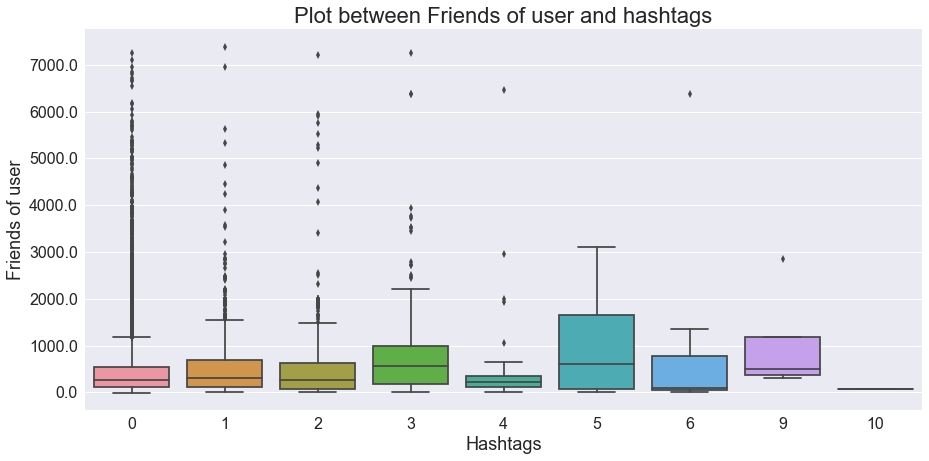

In [18]:
## Just write code here, write justification in next cell
# YOUR CODE HERE
df_plot = df_tweets.iloc[:,:]
sd = df_plot.loc[:,'#friends'].std()
mean = df_plot.loc[:,'#friends'].mean()
high = mean + 3*sd
low = -mean - 3*sd
df_plot.loc[:,'#friends'] = df_plot.loc[:,'#friends'].apply(lambda x: mean if (x<low or x>high) else x)
plt.figure(figsize=(15,7))
ax = sns.boxplot(x='#hashtags', y='#friends',data=df_tweets)
ax.set_xlabel('Hashtags', fontsize=18)
ax.set_ylabel('Friends of user', fontsize=18)
ax.set_title('Plot between Friends of user and hashtags', fontsize=22)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
ax.set_yticklabels(ax.get_yticks(),fontsize=16)

Your justification here

The reason we chose this visualisation is it depicts the number of hashtags used by the friends of the user. 
As can be seen from the graph that there are more than the 7000 friends have 0 hashtags, there are less than 500 friends almost neglible friends of users with 10 hashtags. 

# Q7 [15 marks] (hard)

1. Visualize the distribution of median of #friends of a user, using only the top 2 most frequent languages in the dataset. Your visualization should also convey how this distribution is dependent upon the number of hashtags in the tweet. **[7 marks]**

2. Justify your choice of plot. **[3 marks]**

3. What conclusions can you draw about distribution of median of #friends for both languages? Are there any common trends between two languages and what are the major differences in distribution of median of #friends of user. **[5 marks]**

#hashtags
0     293.0
1     447.0
2     285.5
3     244.0
4     238.0
5     291.5
6    3863.0
Name: #friends, dtype: float64 #hashtags
0     244.000000
1     346.000000
2     219.500000
3     612.021162
4    1525.500000
5    1543.000000
Name: #friends, dtype: float64


[Text(0,0,'0.0'),
 Text(0,0,'500.0'),
 Text(0,0,'1000.0'),
 Text(0,0,'1500.0'),
 Text(0,0,'2000.0'),
 Text(0,0,'2500.0'),
 Text(0,0,'3000.0'),
 Text(0,0,'3500.0'),
 Text(0,0,'4000.0'),
 Text(0,0,'4500.0')]

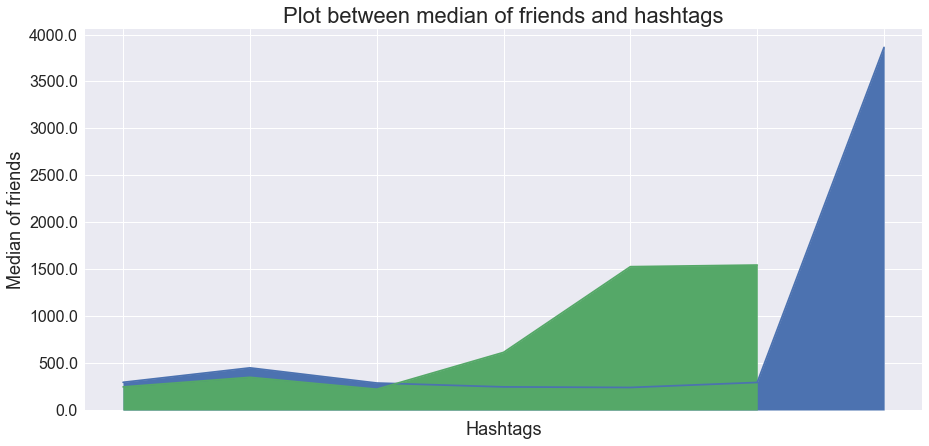

In [19]:
## Just write code here, write justification in next cell
# df_most = df_tweets.groupby('lang_tweet')['lang_tweet'].count().nlargest(2)
#das = pd.DataFrame([])
#das = (df_tweets['lang_user'].value_counts().sort_values(ascending=False).to_dict())
#my_tweets = df_tweets.loc[df_tweets['lang_tweet'].isin(das)]
#a = (df_tweets['lang_user'].values).tolist()
#print(my_tweets.head(5))
#user_lang_df = pd.DataFrame(columns = ['median'])

das = pd.value_counts(df_tweets['lang_tweet']).nlargest(2).index.values.tolist()
lg = df_tweets.loc[(df_tweets['lang_tweet'] == das[0])] 
lgs = df_tweets.loc[(df_tweets['lang_tweet'] == das[1])] 
a1 = lg.groupby('#hashtags')['#friends'].median()
a2 = lgs.groupby('#hashtags')['#friends'].median()
print(a1,a2)
#a1.plot.area(alpha=1)
#a2.plot.area(alpha=1)
plt.figure(figsize=(15,7))
ax = a1.plot.area(alpha=1,stacked=True)
ax = a2.plot.area(alpha=1,stacked=False)
ax.set_xlabel('Hashtags', fontsize=18)
ax.set_ylabel('Median of friends', fontsize=18)
ax.set_title('Plot between median of friends and hashtags', fontsize=22)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
ax.set_yticklabels(ax.get_yticks(),fontsize=16)

Your justification here(Q7.2)
We chose this plot as it clearly decpits the area covered by the median for each language by friends of the user.
It shows the amount of hashtags used by the friends of users using these languages. With this graph we can also understand the behviour of the users while using these lagnuages.

Observations and Conclusions(Q7.3)
What we infer from the graphs is the similarity in the curves for both the language users, with the slope increase of the largest used language increasing after the slope increase of the second highest language users.
There is gradual increase in the slope of the second highest language whereas the highest used language has almost constant curve only towards the end does the slope increases and becomes constant.What can be understood from this is the behaviour of the friends using these languages, the highest used language has more number of hashtags used overall and the friends using it usually do it with a steep increase in the number of hashtags i.e a good majority of the friends use 5or more hashtags while using this language. On the contrary the second highest used language has lower number of hashtags overall and the friends using it have a gradual increase in the number of hashtags but no one has used the maximum hashtags.

### Q8 and Q9 will require to look into methods not part of lecture or labs. We have provided links to some examples that might be useful in solving those questions.

## Q8 [15 marks] (slightly hard)


Complete the following function `get_most_retweeted_tweets(data, n)`. Return details of 'n' most retweeted tweets in the dataset (you might find this [example](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html) useful). You also need to return the number of times a particular tweet is retweeted as part of the dataframe. You do not need to sort the dataframe in any particular order.

**Note** This question might require you to play a bit more with your dataframe, specially things like reset_index of a [dataframe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html) and would require working on more than one dataframe.

In [20]:
def get_most_retweeted_tweets(data, n):
    # YOUR CODE HERE
    data['counts'] = data.groupby('rtwid')['rtwid'].transform('count')
    myseries_dict = pd.value_counts(data['rtwid']).nlargest(10).to_dict()
    df = data.loc[data['twid'].isin(myseries_dict)]
    return (df)

In [21]:
assert(get_most_retweeted_tweets(df_tweets,10).shape==(10,12))
assert(get_most_retweeted_tweets(df_tweets,10).counts.max()==815)

## Q9 [15 marks] (hard)

Complete the following function `get_tweets_hrs(data,tweet_id,hours)`.  The
function returns a dataframe containing all of the retweets for a tweet
(including the tweet) with a given tweet id (`twid=tweet_id`) and within a given
number of hours (`hours`) after it was first tweeted.

You might find this [example](https://pandas.pydata.org/pandas-docs/stable/timedeltas.html) useful.

In [22]:
def get_tweets_hrs(data,tweet_id,hours):
    # YOUR CODE HERE
    original = data.loc[data['twid'] == tweet_id]
    dt = original.iloc[0]['time_created']
    df = data.loc[(data['rtwid'] == tweet_id) & (data['time_created'].apply(lambda x: ((pd.Timedelta(pd.to_datetime(x)-dt).days*24*3600 + pd.Timedelta(pd.to_datetime(x)-dt).seconds) / 3600) < hours))]
    df = df.drop(columns=['counts'])
    return (df)

In [23]:
assert(get_tweets_hrs(df_tweets,'498439420463153152',3).shape==(102,11))
assert(get_tweets_hrs(df_tweets,'498291667007328256',3).shape==(46,11))
df = get_tweets_hrs(df_tweets,'498439420463153152',3)
assert(df['time_created'].iloc[-1] - df['time_created'].iloc[0]==pd.Timedelta('0 days 02:46:06'))

    \text{loss}(x, class) = -\log\left(\frac{\exp(x[class])}{\sum_j \exp(x[j])}\right)
                   = -x[class] + \log\left(\sum_j \exp(x[j])\right)